Review at begining of class.
Notice we have multiple stores for each date -- have a problem autocorrelation, we need to seperate stores. If we are going to do a time series analysis we have to change this and agregate. 

Autocorrelation- whatever datapoint we are predicting is directly based off of a previous datapoint. We always take into account whitenoise/error. How do we find out what autocorrelation we are going to be using? We look for lag in the PCAF partial autocorrelation graph. These plots are not cut and clear. Meant to be a guide. So we want to see more of a random sort of structure.
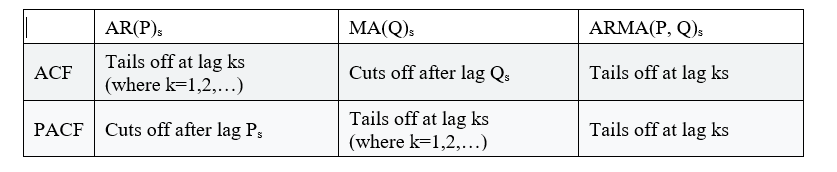 is really important. 

Depending on what that chart says the ACF, PACF says -- that how you will know what test you need to do AR(P's), MA(Q's), ARMA(PQ's).

So this is forecasting, using the data and recognising if there is a pattern of prediction that can be done. We want to also take into account previous errors, making our prediction more accurate. 

This is where we need to find our moving points and stuff like that. It is also worth noting that some of these variables are not significant, how you would write out an example of a model is: 
ACF: tends to trail off in a pattern
PACF: significant lag at 1
Example) WeeklySales t = 187,100,000 + 0.0163 WeeklySales t-1 + wt

ACF: tends to trail off in a pattern
PACF: significant lag at 2
Example) WeeklySales t = 187,100,000 + 0.0173 WeeklySales t-1 – 0.0058 WeeklySales t-2 + wt






In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

df = pd.read_csv('walmart_sales.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [2]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    # Copied from https://machinelearningmastery.com/time-series-data-stationary-python/

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_process import arma_generate_sample

In [4]:
import statsmodels.tsa as sm
num_samples = 128

arparams = np.array([.5, -.5])
maparams = np.array([.5, -.5])


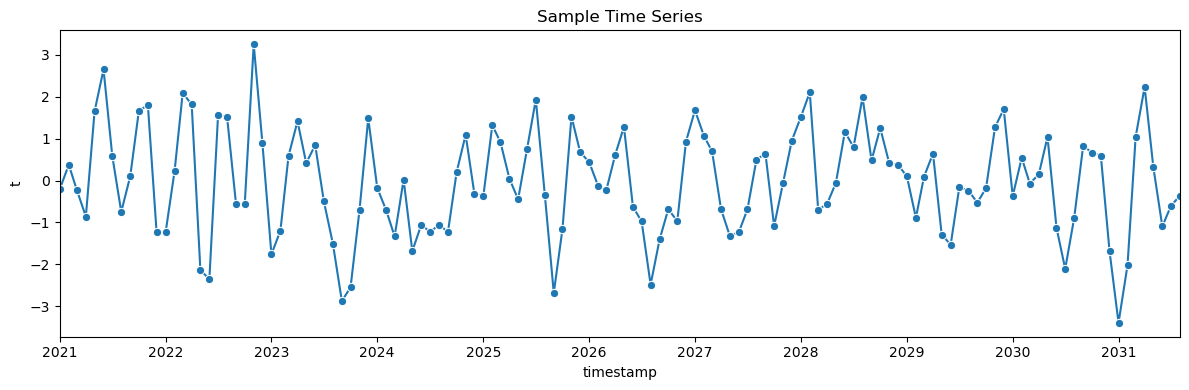

In [5]:
num_samples =  128

np.random.seed(12345)
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1] # add zero-lag

sample = pd.DataFrame({'timestamp' : pd.date_range('2021-01-01', periods=num_samples, freq='MS'),
                       't' : sm.arima_process.arma_generate_sample(ar, ma, num_samples)
                      })

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))

sns.lineplot(x=sample.timestamp, y=sample['t'], marker='o')
ax.set_xlim([sample.timestamp.iloc[0], sample.timestamp.iloc[-1]])
ax.set_title('Sample Time Series')
plt.tight_layout()
plt.show()

this

In [6]:
sample

,timestamp,t
0,2021-01-01,-0.204708
1,2021-02-01,0.376590
2,2021-03-01,-0.228790
3,2021-04-01,-0.858420
4,2021-05-01,1.650966
...,...,...
123,2031-04-01,2.231369
124,2031-05-01,0.321182
125,2031-06-01,-1.094236
126,2031-07-01,-0.600051


In [7]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(sample.t, order=(2, 0, 2))
model = model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      t   No. Observations:                  128
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -181.143
Date:                Tue, 11 Feb 2025   AIC                            374.286
Time:                        08:49:48   BIC                            391.398
Sample:                             0   HQIC                           381.239
                                - 128                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0345      0.119     -0.290      0.772      -0.268       0.199
ar.L1          0.1699      0.201      0.847      0.397      -0.223       0.563
ar.L2         -0.5301      0.117     -4.527      0.0

In [8]:
model = ARIMA(sample.t, order=(2, 0, 1))
model = model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      t   No. Observations:                  128
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -182.409
Date:                Tue, 11 Feb 2025   AIC                            374.818
Time:                        08:49:48   BIC                            389.078
Sample:                             0   HQIC                           380.612
                                - 128                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0309      0.107     -0.289      0.773      -0.241       0.179
ar.L1          0.4230      0.195      2.167      0.030       0.040       0.806
ar.L2         -0.4262      0.125     -3.402      0.0

AR and MA correlate to the original MA(2) & AR(2) formula - you can plug them into the equation

AR(1) not significant, AR(2) is. Cannot drop AR(1), if we drop the second one, its still insignificant. 

When we change the order to (2, 0, 1), MA becomes super insigifnicant.
Both of our lags for autoregression are significant. All we're doing is intrepeting the ACF and PACF plots to the best of our ability, finding autoregressive lag, finding moving average lag, - remove insiginifcant variables.

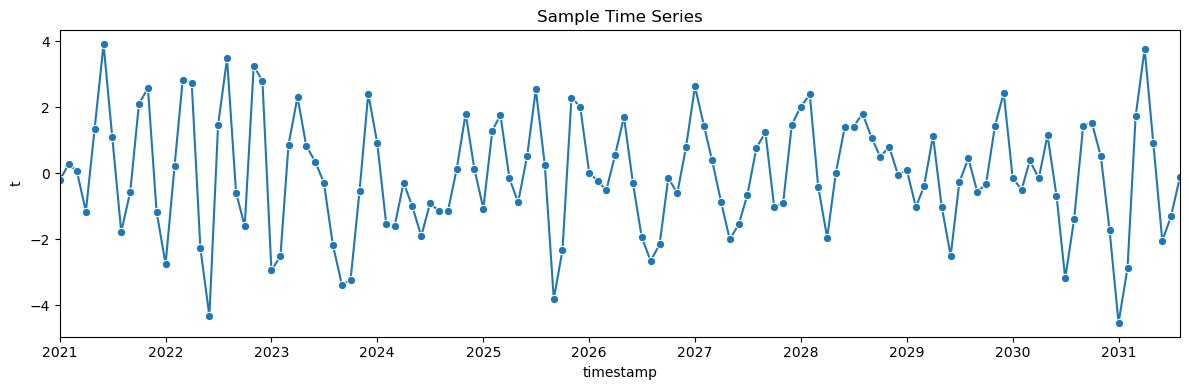

In [9]:

np.random.seed(12345)
ar = np.r_[1,-arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag

sample = pd.DataFrame({'timestamp' : pd.date_range('2021-01-01', periods=num_samples, freq='MS'),
                       't' : sm.arima_process.arma_generate_sample(ar, ma, num_samples)
                      })

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))

sns.lineplot(x=sample.timestamp, y=sample['t'], marker='o')
ax.set_xlim([sample.timestamp.iloc[0], sample.timestamp.iloc[-1]])
ax.set_title('Sample Time Series')
plt.tight_layout()
plt.show()

In [10]:
model = ARIMA(sample.t, order=(0, 0, 2))
model = model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      t   No. Observations:                  128
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -199.618
Date:                Tue, 11 Feb 2025   AIC                            407.235
Time:                        08:49:49   BIC                            418.643
Sample:                             0   HQIC                           411.871
                                - 128                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0338      0.274     -0.124      0.902      -0.570       0.502
ma.L1          1.3497     17.749      0.076      0.939     -33.438      36.137
ma.L2          0.3497      6.197      0.056      0.9

c:\Users\danli\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


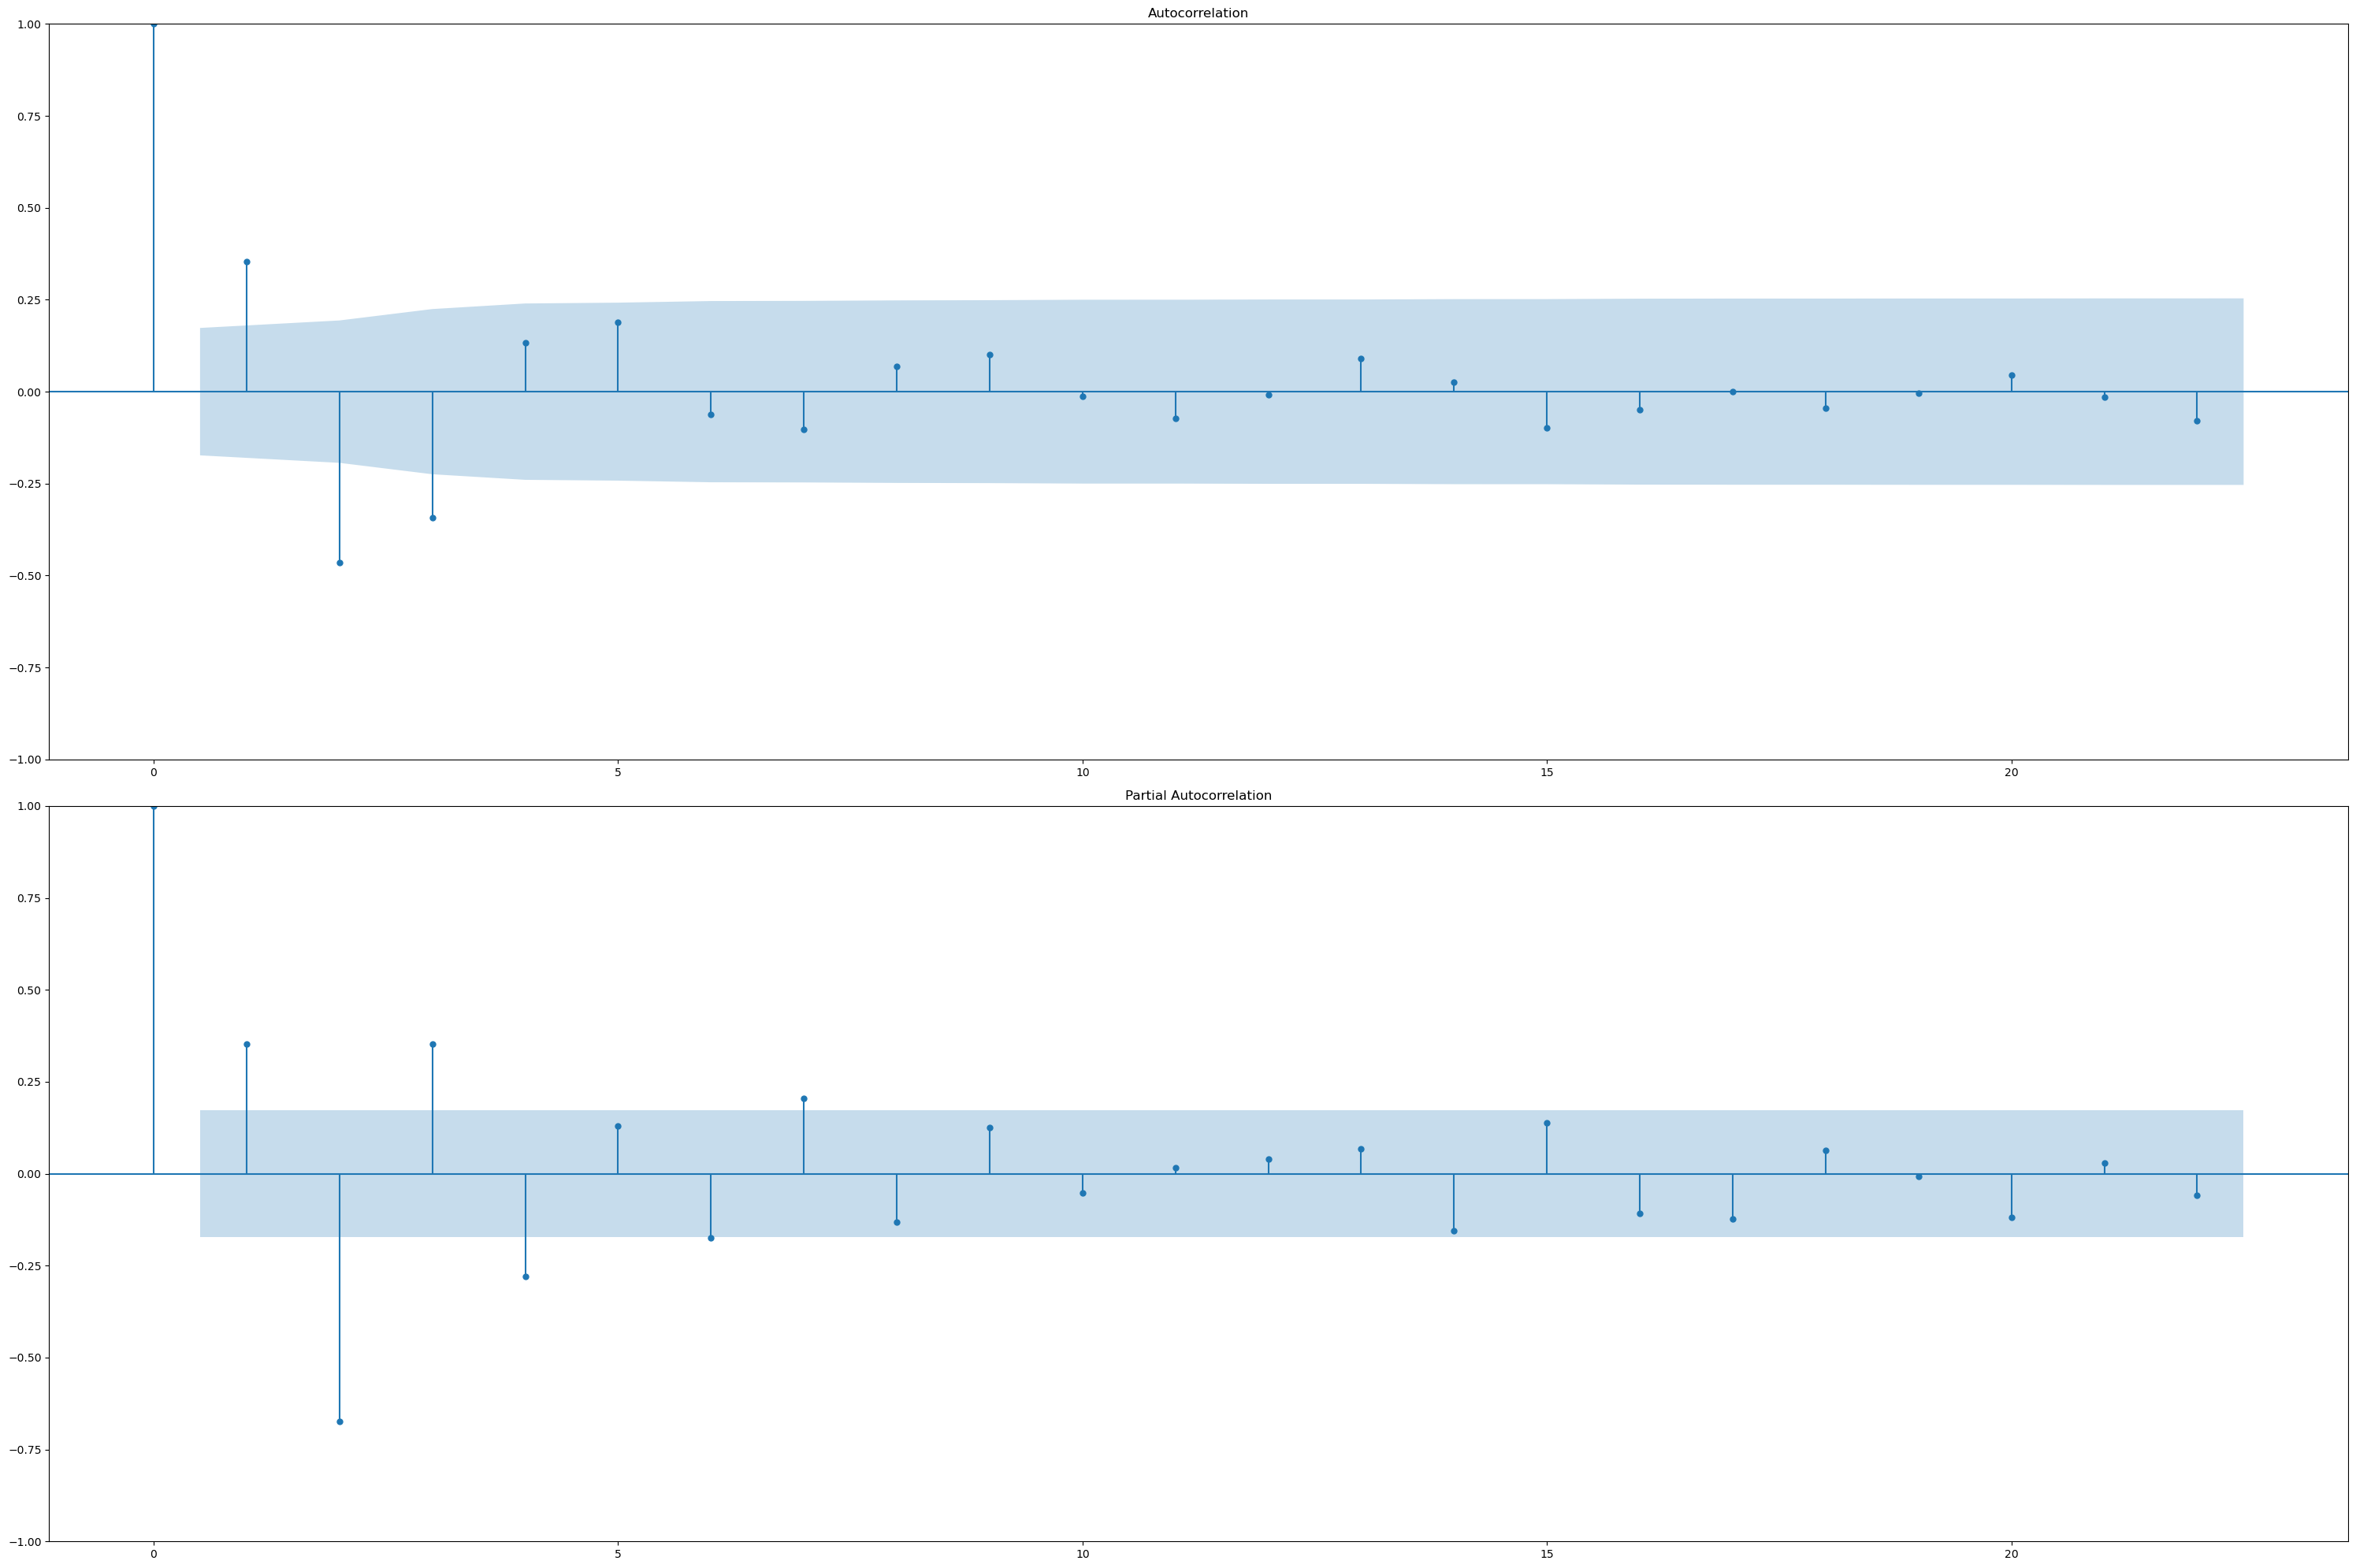

In [11]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(30,20))
plot_acf(sample['t'], ax=ax[0])
plot_pacf(sample['t'], ax=ax[1])



plt.tight_layout()
plt.show()

In [12]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(sample.t, order=(2, 0, 2))
model = model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      t   No. Observations:                  128
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -184.536
Date:                Tue, 11 Feb 2025   AIC                            381.071
Time:                        08:49:50   BIC                            398.184
Sample:                             0   HQIC                           388.024
                                - 128                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0301      0.120     -0.250      0.803      -0.266       0.206
ar.L1          0.3740      0.171      2.182      0.029       0.038       0.710
ar.L2         -0.5014      0.082     -6.143      0.0

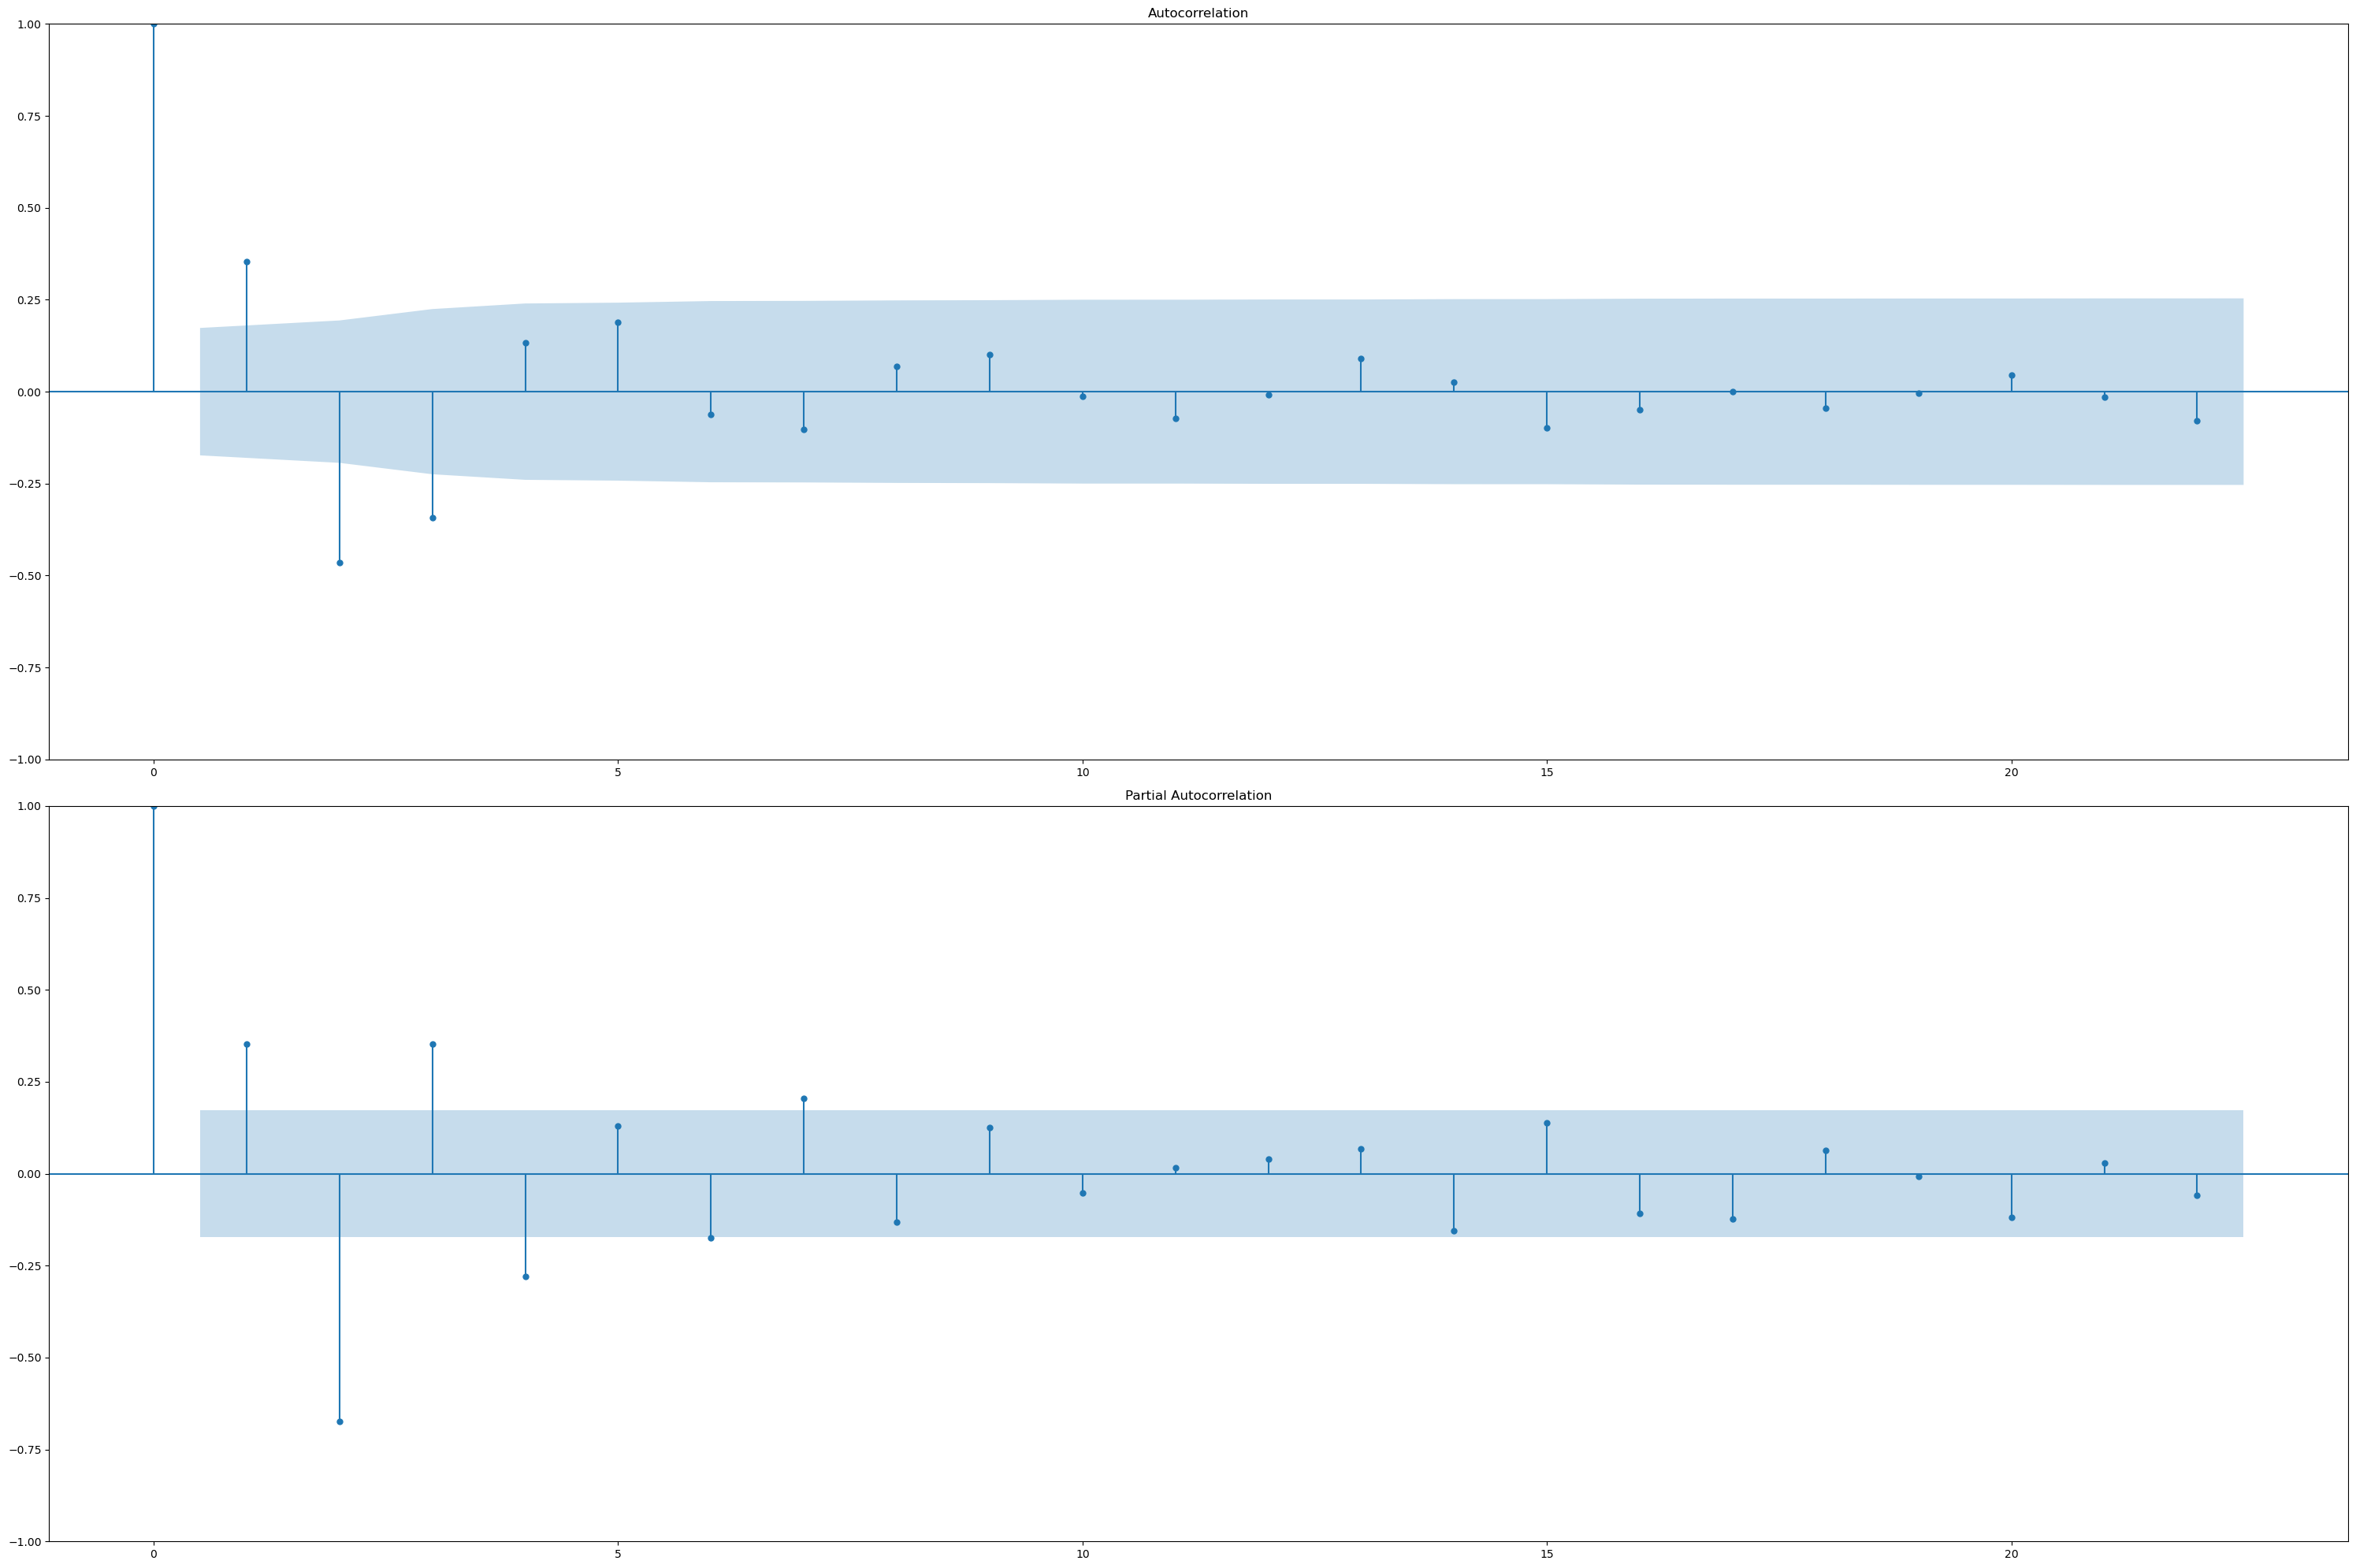

In [13]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(30,20))
plot_acf(sample['t'], ax=ax[0])
plot_pacf(sample['t'], ax=ax[1])



plt.tight_layout()
plt.show()